In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [2]:
df=pd.read_csv('F:/project_data_ science/credit-card-default.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
df.defaulted.value_counts()

0    23364
1     6636
Name: defaulted, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [5]:
df=df.drop(['ID'],axis=1)


In [6]:
x=df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
y=df.defaulted

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.3)
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,n_jobs=2)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_jobs=2)

In [8]:
y_pred=rfc.predict(x_test)
y_pred_=rfc.predict(x_train)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [9]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6927
           1       0.67      0.39      0.49      2073

    accuracy                           0.81      9000
   macro avg       0.75      0.66      0.69      9000
weighted avg       0.80      0.81      0.79      9000



In [10]:
print(classification_report(y_train,y_pred_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16437
           1       1.00      1.00      1.00      4563

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000



model is over fitted


In [11]:
print(confusion_matrix(y_pred,y_test))    
print( confusion_matrix(y_train,y_pred_))

[[6526 1274]
 [ 401  799]]
[[16436     1]
 [    9  4554]]


hyperparameter tuning


tunning with max_depth

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_fold=5
parameters={'max_depth':range(1,10,2)}
rf=RandomForestClassifier()
rf=GridSearchCV(rf,parameters,cv=n_fold,n_jobs=-1,scoring='accuracy',return_train_score=True)


In [13]:
rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10, 2)}, return_train_score=True,
             scoring='accuracy')

In [14]:
scores=rf.cv_results_

In [15]:
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.646662,0.063815,0.088824,0.003950,1,{'max_depth': 1},0.782619,0.782619,0.784762,0.782857,...,0.783143,0.000816,5,0.782738,0.782738,0.785000,0.782679,0.782679,0.783167,0.000917
1,2.799279,0.093313,0.107224,0.014093,3,{'max_depth': 3},0.814048,0.808810,0.810238,0.809048,...,0.810476,0.001881,4,0.812321,0.811071,0.806786,0.809821,0.810595,0.810119,0.001854
2,4.281329,0.194966,0.119711,0.015435,5,{'max_depth': 5},0.817619,0.814286,0.817619,0.812143,...,0.815762,0.002195,3,0.821667,0.820357,0.819226,0.819881,0.824821,0.821190,0.001984
3,6.476169,0.377264,0.159944,0.047769,7,{'max_depth': 7},0.821667,0.816429,0.822619,0.817143,...,0.819333,0.002439,2,0.837500,0.839048,0.833869,0.836726,0.837024,0.836833,0.001684
4,5.448085,1.180993,0.074318,0.037905,9,{'max_depth': 9},0.820952,0.819048,0.823810,0.819762,...,0.820238,0.002087,1,0.854286,0.854821,0.853512,0.853631,0.853214,0.853893,0.000582


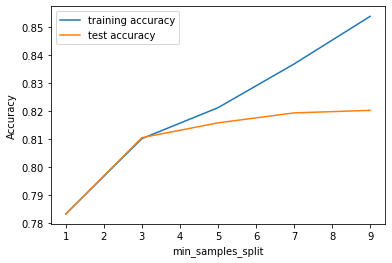

In [16]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_fold=5
parameters={'n_estimators':range(100,500,100)}
rf=RandomForestClassifier()
rf=GridSearchCV(rf,parameters,cv=n_fold,n_jobs=-1,scoring='accuracy',return_train_score=True)
rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': range(100, 500, 100)},
             return_train_score=True, scoring='accuracy')

In [18]:
scores=rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,11.279038,0.173364,0.267369,0.029865,100,{'n_estimators': 100},0.816667,0.815714,0.821667,0.819286,...,0.817762,0.002374,3,0.999643,0.999643,0.999464,0.999702,0.999583,0.999607,0.000081
1,21.925013,1.066653,0.535247,0.061970,200,{'n_estimators': 200},0.819762,0.814048,0.822381,0.814762,...,0.817524,0.003132,4,0.999643,0.999702,0.999583,0.999702,0.999583,0.999643,0.000053
2,30.839536,1.643525,0.690684,0.062776,300,{'n_estimators': 300},0.818333,0.816667,0.824048,0.817619,...,0.818524,0.002878,2,0.999643,0.999702,0.999583,0.999702,0.999583,0.999643,0.000053
3,30.592081,3.806816,0.510877,0.116034,400,{'n_estimators': 400},0.823095,0.816667,0.824762,0.818333,...,0.819667,0.003635,1,0.999643,0.999702,0.999583,0.999702,0.999583,0.999643,0.000053


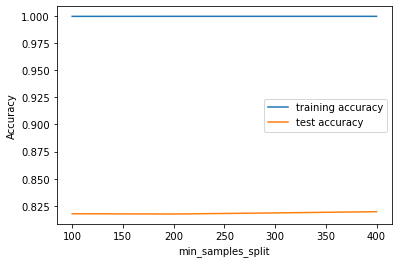

In [19]:
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_fold=5
parameters={'max_features':[4,8,10,12,17]}
rf=RandomForestClassifier()
rf=GridSearchCV(rf,parameters,cv=n_fold,n_jobs=-1,scoring='accuracy',return_train_score=True)
rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [4, 8, 10, 12, 17]},
             return_train_score=True, scoring='accuracy')

In [21]:
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,11.279038,0.173364,0.267369,0.029865,100,{'n_estimators': 100},0.816667,0.815714,0.821667,0.819286,...,0.817762,0.002374,3,0.999643,0.999643,0.999464,0.999702,0.999583,0.999607,0.000081
1,21.925013,1.066653,0.535247,0.061970,200,{'n_estimators': 200},0.819762,0.814048,0.822381,0.814762,...,0.817524,0.003132,4,0.999643,0.999702,0.999583,0.999702,0.999583,0.999643,0.000053
2,30.839536,1.643525,0.690684,0.062776,300,{'n_estimators': 300},0.818333,0.816667,0.824048,0.817619,...,0.818524,0.002878,2,0.999643,0.999702,0.999583,0.999702,0.999583,0.999643,0.000053
3,30.592081,3.806816,0.510877,0.116034,400,{'n_estimators': 400},0.823095,0.816667,0.824762,0.818333,...,0.819667,0.003635,1,0.999643,0.999702,0.999583,0.999702,0.999583,0.999643,0.000053


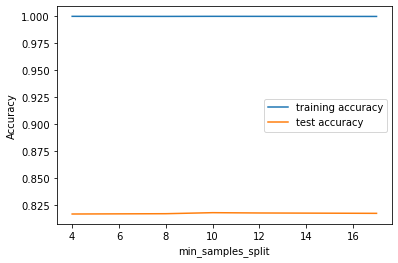

In [22]:
scores=rf.cv_results_
pd.DataFrame(scores).head()
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 40, 2),
    'min_samples_split': range(2, 100, 2),
    'n_estimators':[10,50,5],
    'max_features':[5,8,1]
    
}

n_folds = 2

# Instantiate the grid search model
rf=RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, n_jobs=-1,
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)


Fitting 2 folds for each of 79380 candidates, totalling 158760 fits
